# Day 5 Mobile Price Classification

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


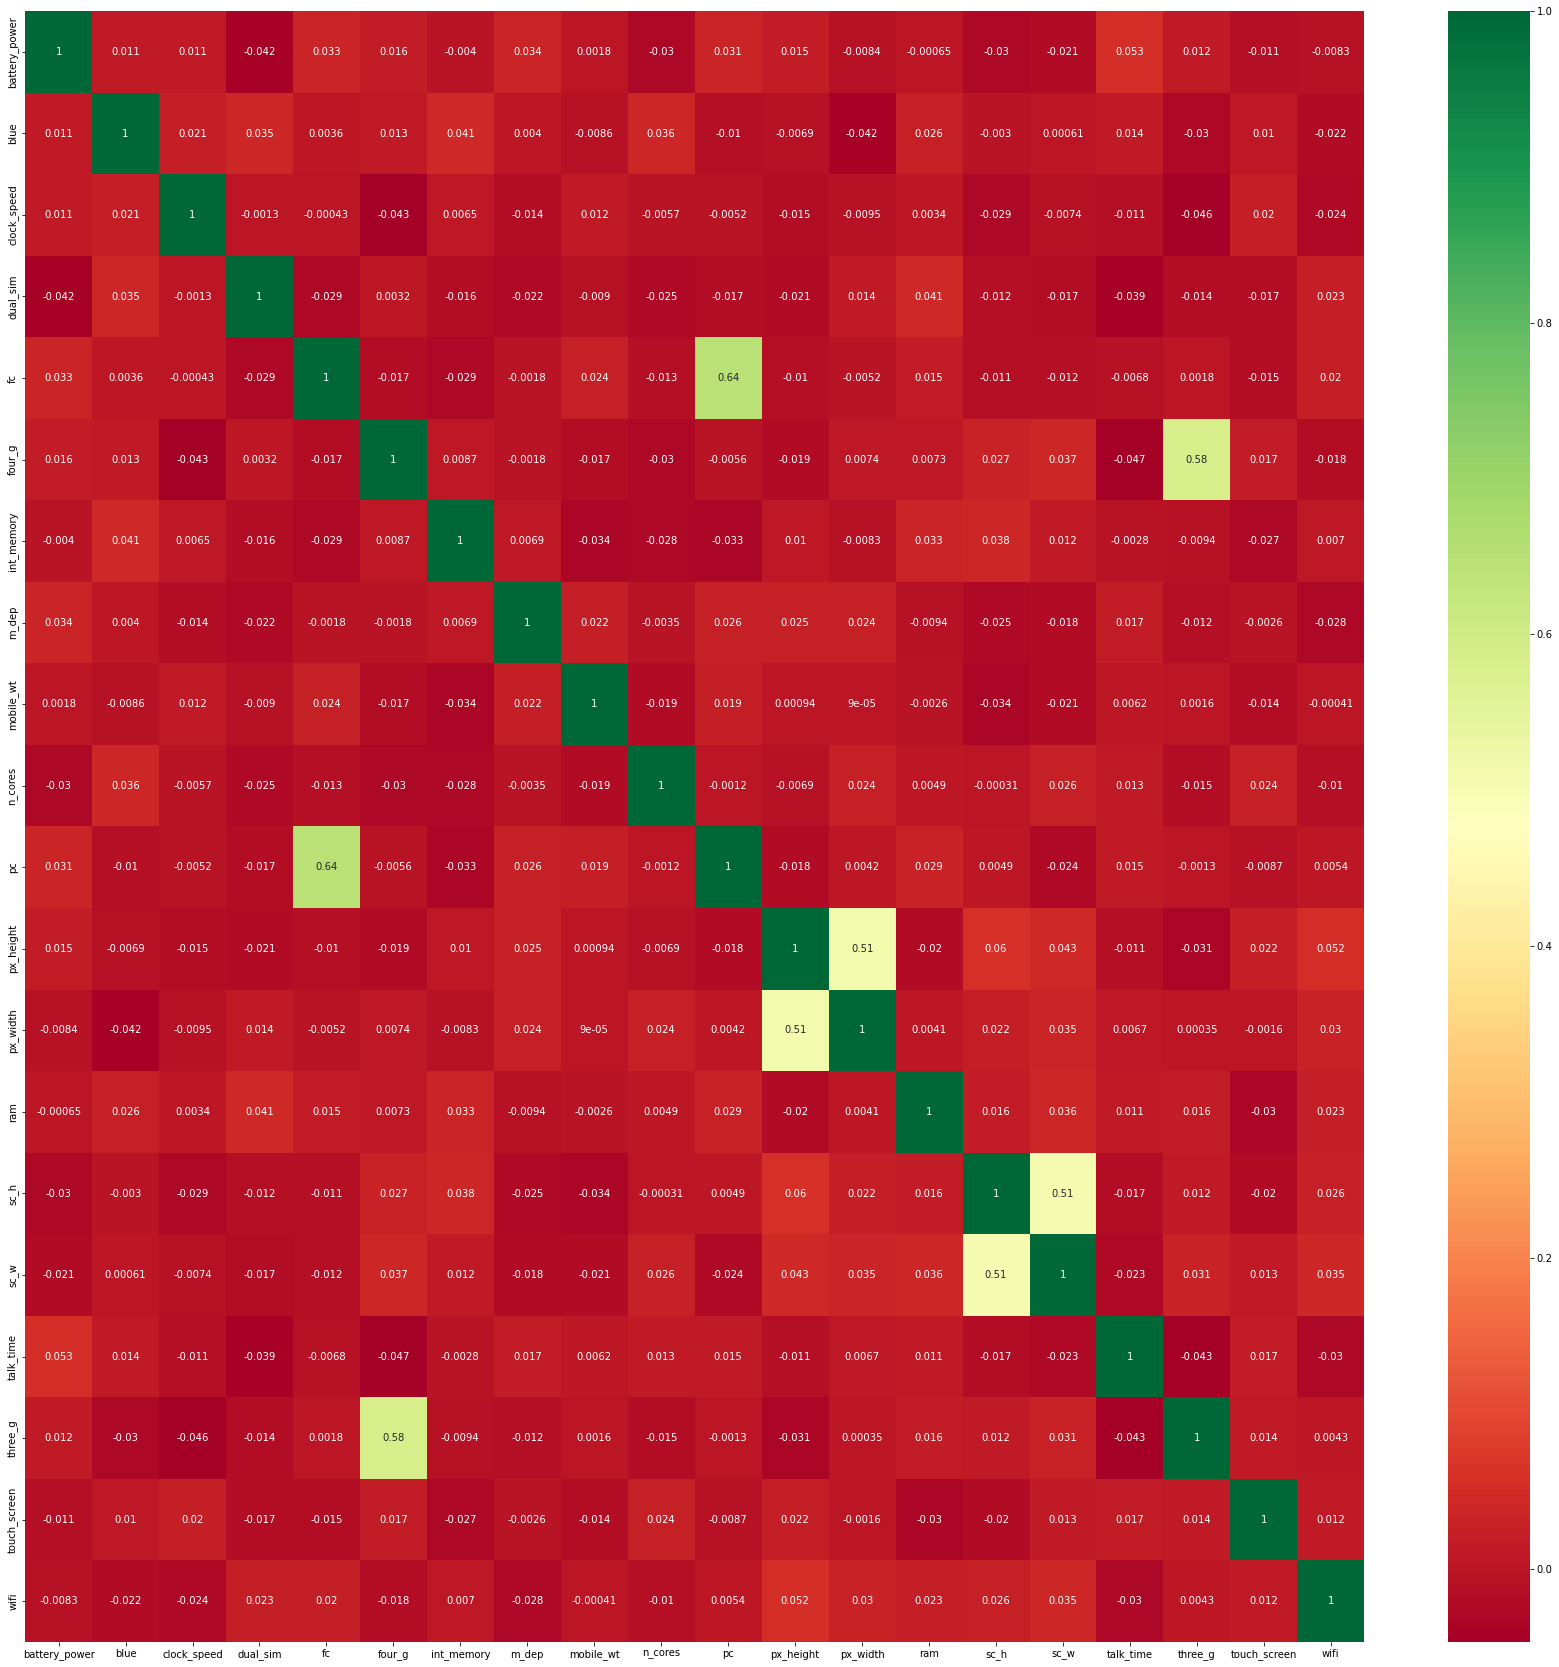

In [17]:
#Feature selection

X = train.drop(["price_range"], axis = 1)
y = train["price_range"].astype(int)


corr_mat = X.corr()
top_corr = corr_mat.index
plt.figure(figsize=(30,30))
s = sns.heatmap(X[top_corr].corr(), annot=True, cmap="RdYlGn")

In [26]:

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

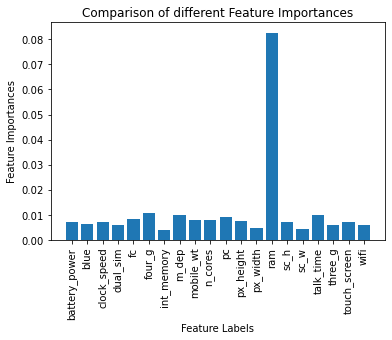

In [28]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [47]:
features_top = list(zip(X.columns, feature_importance_normalized))
features_top = dict(features_top)
features_top_5 = list(sorted(features_top.items(), key=lambda item: item[1]))[-5:]
features_top_5_columns = list(dict(features_top_5).keys())
features_top_5_columns

['pc', 'talk_time', 'm_dep', 'four_g', 'ram']

In [48]:
X_ft = X[features_top_5_columns]
X_ft.head()

,pc,talk_time,m_dep,four_g,ram
0,2,19,0.6,0,2549
1,6,7,0.7,1,2631
2,6,9,0.9,1,2603
3,9,11,0.8,0,2769
4,14,15,0.6,1,1411


In [49]:
X_ft = X_ft.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_ft, y, train_size=0.8, random_state=910)
RF = RandomForestClassifier(n_estimators=5)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
print(accuracy_score(pred, y_test))

0.715


In [53]:
preds_for_test = RF.predict(test[features_top_5_columns].to_numpy())

In [57]:
predictions = pd.DataFrame(preds_for_test, columns=["Predictions"])

In [58]:
predictions

,Predictions
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2
